In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Going to try going in through the API in order to grab as much relevant data as possible
import json
import requests
from pprint import pprint

In [2]:
# Load in period coverage data from csv
filepath="Resources/PeriodCoverage.csv"
period_cov_df= pd.read_csv(filepath,index_col=0)
period_cov_df

,Indicator Count
Year/Range,
2020,139
2015-2019,94
2019,150
2014-2018,96
2018,168
...,...
2018.05,3
2018.04,3
2018.03,3


In [3]:
# Turn dataframe back into dictionary
period_cov_dict = period_cov_df.to_dict()
period_cov_dict=period_cov_dict['Indicator Count']
period_cov_dict

{'2020': 139,
 '2015-2019': 94,
 '2019': 150,
 '2014-2018': 96,
 '2018': 168,
 '2017': 225,
 '2016': 203,
 '2015': 184,
 '2014': 175,
 '2013': 161,
 '2012': 140,
 '2011': 158,
 '2010': 131,
 '2009': 107,
 '2008': 87,
 '2007': 105,
 '2006': 87,
 '2005': 103,
 '2004': 87,
 '2003': 101,
 '2002': 87,
 '2001': 101,
 '2000': 87,
 '2020-2021': 52,
 '2021': 68,
 '2017-2021': 9,
 '2016-2020': 39,
 '2013-2017': 32,
 '2012-2016': 29,
 '2011-2015': 34,
 '2010-2014': 31,
 '2009-2013': 34,
 '2008-2012': 31,
 '2007-2011': 24,
 '2006-2010': 28,
 '2005-2009': 17,
 '2004-2008': 20,
 '2003-2007': 16,
 '2002-2006': 13,
 '2001-2005': 16,
 '2000-2004': 13,
 '1999-2003': 16,
 '1998-2002': 13,
 '1997-2001': 10,
 '1996-2000': 13,
 '1995-1999': 13,
 '1999': 12,
 '1994-1998': 17,
 '1998': 12,
 '1993-1997': 13,
 '1997': 12,
 '1992-1996': 10,
 '1996': 12,
 '1991-1995': 13,
 '1995': 10,
 '1990-1994': 13,
 '1994': 10,
 '1989-1993': 17,
 '1993': 10,
 '1988-1992': 13,
 '1992': 10,
 '1987-1991': 10,
 '1991': 10,
 '1986

<BarContainer object of 36 artists>

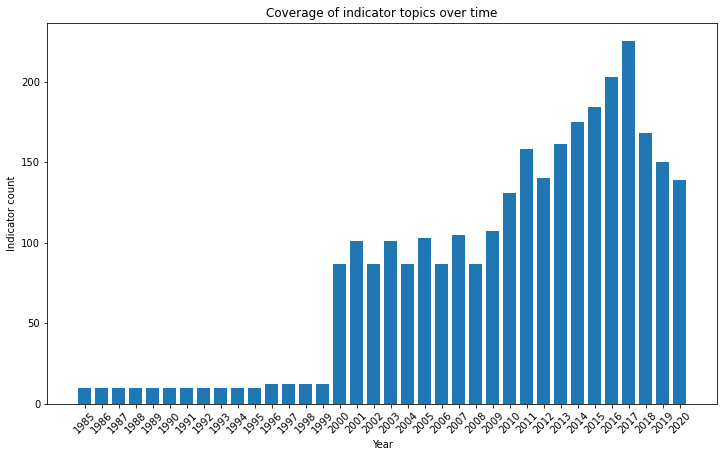

In [4]:
# Now to make a bar chart from that data...
# Let's first clean up that data to only keep the single year keys...

single_yr_cov_dict = {}
single_yr_keys = [year for year in range(1985,2021)]

for year in single_yr_keys:
    single_yr_cov_dict[year] = period_cov_dict[str(year)]


plt.figure(figsize=(12,7))
plt.xticks(rotation = 45)
display(plt.bar(range(len(single_yr_cov_dict)),list(single_yr_cov_dict.values()),
       tick_label = list(single_yr_cov_dict.keys())))
plt.xlabel("Year")
plt.ylabel("Indicator count")
plt.title("Coverage of indicator topics over time")
plt.savefig('Images/single_year_coverage_bars.png',format='png')

In [4]:
# Load in relevant indicators data from csv
data_csv_file = "Resources/fullcitydata2010to2020.csv"
cleaned_data_df= pd.read_csv(data_csv_file)
cleaned_data_df

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
0,670.0,25.5,13759.0000,147.0,5.6,345.0,15.3,0.0000,26213.0000,4479.0,...,31.9,14222.0000,880.0,38.3,171.0,6.3,5615.0,239.8,0.0,28414.0000
1,636.0,24.7,12409.0000,172.0,6.6,370.0,16.3,0.0000,26427.0000,4316.0,...,26.6,13988.0000,886.0,38.3,160.0,5.8,5609.0,239.0,11.0,26829.0000
2,791.0,29.9,12277.0000,163.0,6.2,308.0,13.7,0.0000,22757.0000,4414.0,...,28.4,13492.0000,906.0,39.1,193.0,7.2,5707.0,242.4,0.0,26271.0000
3,816.0,31.1,12117.0000,188.0,7.3,350.0,15.4,431.0000,17881.0000,4513.0,...,23.7,11836.0000,946.0,40.7,205.0,7.5,5666.0,241.0,16.4,25710.0000
4,790.0,30.0,12532.0000,212.0,8.1,439.0,19.3,461.0000,14560.0000,4420.0,...,31.1,9804.0000,968.0,41.4,199.0,7.3,5725.0,243.5,32.9,24140.0000
5,824.0,31.2,13094.0000,224.0,8.4,561.0,24.7,536.0000,13170.0000,4523.0,...,29.3,9643.0000,1048.0,45.4,183.0,6.7,6097.0,258.6,11.0,24701.0000
6,1127.0,42.4,42.9204,261.0,9.8,593.0,26.1,0.0000,46.2960,4420.0,...,32.8,90.7410,1065.0,46.0,197.0,7.2,6074.0,256.9,5.5,145.3528
7,1255.0,47.4,55.5552,223.0,8.5,537.0,23.5,0.9076,33.9518,4246.0,...,30.4,92.5604,1190.0,51.7,219.0,7.9,6107.0,258.2,0.0,160.0976
8,1295.0,49.0,61.7652,243.0,9.3,499.0,22.6,1.1982,20.1546,4108.0,...,25.7,87.5844,1165.0,50.9,202.0,7.2,6109.0,262.9,5.5,167.9396
9,1320.0,50.0,55.4120,245.0,9.5,443.0,20.1,0.0000,22.5152,4152.0,...,27.5,61.6978,1188.0,52.3,215.0,7.8,5997.0,258.2,0.0,126.9860


In [5]:
# Get correlation matrix
cleaned_data_df.corr()

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
VRAC,1.000000,0.999916,-0.872107,0.900024,0.909422,0.584813,0.628579,-0.382338,-0.858794,-0.830383,...,-0.133388,-0.875248,0.972865,0.974163,0.832279,0.797121,0.891143,0.921501,-0.433797,-0.877633
VRACR,0.999916,1.000000,-0.871860,0.898971,0.908789,0.581020,0.625044,-0.384312,-0.856687,-0.835576,...,-0.141493,-0.873963,0.972979,0.974476,0.829884,0.793923,0.888586,0.919947,-0.432747,-0.876990
CZA,-0.872107,-0.871860,1.000000,-0.786278,-0.793688,-0.648315,-0.679550,0.544850,0.933655,0.779417,...,-0.007980,0.973700,-0.850118,-0.850434,-0.713356,-0.656792,-0.782044,-0.793783,0.474724,0.997023
VRAL,0.900024,0.898971,-0.786278,1.000000,0.998738,0.788911,0.820493,-0.104886,-0.873724,-0.648834,...,-0.024801,-0.856062,0.912410,0.904030,0.723751,0.689675,0.919357,0.925804,-0.144481,-0.812068
VRALR,0.909422,0.908789,-0.793688,0.998738,1.000000,0.766284,0.799584,-0.110187,-0.876870,-0.670228,...,-0.058059,-0.860190,0.919715,0.912049,0.740812,0.705428,0.910090,0.921387,-0.142684,-0.817975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSUR,0.797121,0.793923,-0.656792,0.689675,0.705428,0.369804,0.394978,-0.054610,-0.741836,-0.510400,...,-0.127963,-0.697380,0.773446,0.763058,0.993634,1.000000,0.647918,0.649367,-0.173051,-0.666879
VRTO,0.891143,0.888586,-0.782044,0.919357,0.910090,0.837578,0.865543,-0.171099,-0.865406,-0.630419,...,0.033805,-0.849931,0.937285,0.932065,0.685228,0.647918,1.000000,0.990187,-0.373617,-0.810611
VRTOR,0.921501,0.919947,-0.793783,0.925804,0.921387,0.782232,0.818452,-0.208199,-0.861363,-0.703187,...,-0.037164,-0.853044,0.957666,0.956357,0.690697,0.649367,0.990187,1.000000,-0.390341,-0.819812
CDTBR,-0.433797,-0.432747,0.474724,-0.144481,-0.142684,-0.076928,-0.104214,0.765167,0.262198,0.415551,...,-0.021132,0.346414,-0.372437,-0.397262,-0.180870,-0.173051,-0.373617,-0.390341,1.000000,0.442792


In [8]:
# Create dataframe of year-to-year changes in data
data_changes_df = cleaned_data_df.diff().drop(index=0)
data_changes_df

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
1,-34.0,-0.8,-1350.0000,25.0,1.0,25.0,1.0,0.0000,214.0000,-163.0,...,-5.3,-234.0000,6.0,0.0,-11.0,-0.5,-6.0,-0.8,11.0,-1585.0000
2,155.0,5.2,-132.0000,-9.0,-0.4,-62.0,-2.6,0.0000,-3670.0000,98.0,...,1.8,-496.0000,20.0,0.8,33.0,1.4,98.0,3.4,-11.0,-558.0000
3,25.0,1.2,-160.0000,25.0,1.1,42.0,1.7,431.0000,-4876.0000,99.0,...,-4.7,-1656.0000,40.0,1.6,12.0,0.3,-41.0,-1.4,16.4,-561.0000
4,-26.0,-1.1,415.0000,24.0,0.8,89.0,3.9,30.0000,-3321.0000,-93.0,...,7.4,-2032.0000,22.0,0.7,-6.0,-0.2,59.0,2.5,16.5,-1570.0000
5,34.0,1.2,562.0000,12.0,0.3,122.0,5.4,75.0000,-1390.0000,103.0,...,-1.8,-161.0000,80.0,4.0,-16.0,-0.6,372.0,15.1,-21.9,561.0000
6,303.0,11.2,-13051.0796,37.0,1.4,32.0,1.4,-536.0000,-13123.7040,-103.0,...,3.5,-9552.2590,17.0,0.6,14.0,0.5,-23.0,-1.7,-5.5,-24555.6472
7,128.0,5.0,12.6348,-38.0,-1.3,-56.0,-2.6,0.9076,-12.3442,-174.0,...,-2.4,1.8194,125.0,5.7,22.0,0.7,33.0,1.3,-5.5,14.7448
8,40.0,1.6,6.2100,20.0,0.8,-38.0,-0.9,0.2906,-13.7972,-138.0,...,-4.7,-4.9760,-25.0,-0.8,-17.0,-0.7,2.0,4.7,5.5,7.8420
9,25.0,1.0,-6.3532,2.0,0.2,-56.0,-2.5,-1.1982,2.3606,44.0,...,1.8,-25.8866,23.0,1.4,13.0,0.6,-112.0,-4.7,-5.5,-40.9536
10,511.0,19.0,0.2864,70.0,2.5,84.0,3.8,3.8136,40.9304,-96.0,...,-0.2,-21.3528,178.0,7.7,13.0,0.5,414.0,17.3,0.0,-22.8458


In [11]:
# Create correlation matrix of changes
diff_corr_df = data_changes_df.corr()
diff_corr_df

,VRAC,VRACR,CZA,VRAL,VRALR,VRAD,VRADR,CZO,CZB,VRCA,...,VRPRR,CZR,VRST,VRSTR,VRSU,VRSUR,VRTO,VRTOR,CDTBR,CZV
VRAC,1.000000,0.999097,-0.365566,0.490736,0.471262,0.131958,0.137535,-0.416356,-0.247628,-0.162311,...,0.177895,-0.290570,0.646089,0.618923,0.460147,0.456601,0.515720,0.483577,-0.268232,-0.351065
VRACR,0.999097,1.000000,-0.366913,0.499071,0.482421,0.135582,0.140501,-0.410030,-0.237121,-0.184364,...,0.151296,-0.287191,0.654944,0.627412,0.447562,0.439779,0.508795,0.477879,-0.250994,-0.349976
CZA,-0.365566,-0.366913,1.000000,-0.256644,-0.273029,-0.037812,-0.028629,0.813164,0.871793,0.227637,...,-0.276100,0.955800,0.210716,0.237148,-0.168904,-0.149038,0.249988,0.303592,0.108989,0.994326
VRAL,0.490736,0.499071,-0.256644,1.000000,0.994910,0.635320,0.659127,-0.122404,-0.209695,-0.100449,...,0.078732,-0.277348,0.137724,0.091622,-0.293053,-0.281558,0.381115,0.398214,0.320457,-0.261120
VRALR,0.471262,0.482421,-0.273029,0.994910,1.000000,0.591794,0.613823,-0.104431,-0.215583,-0.117972,...,0.032781,-0.288066,0.111084,0.064240,-0.280896,-0.277821,0.306637,0.327867,0.371821,-0.272583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSUR,0.456601,0.439779,-0.149038,-0.281558,-0.277821,-0.487931,-0.526961,-0.134018,-0.258077,0.273499,...,0.342855,-0.140627,0.276188,0.255135,0.990328,1.000000,-0.108920,-0.212412,-0.262782,-0.145908
VRTO,0.515720,0.508795,0.249988,0.381115,0.306637,0.622711,0.638709,0.070901,0.234178,0.136787,...,0.012424,0.254833,0.696591,0.700934,-0.138991,-0.108920,1.000000,0.976545,-0.431204,0.240969
VRTOR,0.483577,0.477879,0.303592,0.398214,0.327867,0.574658,0.607441,0.105070,0.301905,0.079249,...,-0.068751,0.312541,0.631212,0.643828,-0.240660,-0.212412,0.976545,1.000000,-0.378213,0.295920
CDTBR,-0.268232,-0.250994,0.108989,0.320457,0.371821,0.088851,0.088267,0.344388,0.022871,-0.352708,...,-0.077144,-0.004969,-0.281445,-0.345141,-0.209119,-0.262782,-0.431204,-0.378213,1.000000,0.089497


In [20]:
# Would like to find all correlations (absolute value) above 0.5 and (strictly) less than 1...
for i in range(67):
    for j in range(66-i):
        if abs(diff_corr_df.iloc[i,i+j+1])>0.95:
            ind_1 = diff_corr_df.columns[i]
            ind_2 = diff_corr_df.columns[i+j+1]
            print(f'{ind_1}&{ind_2}')

VRAC&VRACR
VRAC&VRDID
VRAC&VRDIDR
VRAC&VRDO
VRAC&VRDOR
VRAC&VRIN
VRAC&VRINR
VRACR&VRDID
VRACR&VRDIDR
VRACR&VRDO
VRACR&VRDOR
VRACR&VRIN
VRACR&VRINR
CZA&CZH
CZA&CZL
CZA&CZP
CZA&CZR
CZA&CZV
VRAL&VRALR
VRAD&VRADR
CZB&CZT
CZB&CZP
CZB&CZR
VRCA&VRCAR
VRCV&VRCVR
VRLV&VRLVR
VRLR&VRLRR
VRCR&VRCRR
VRCHD&VRCHDR
VRDIA&VRDIAR
VRDIB&VRDIBR
VRDI&VRDIR
VRDID&VRDIDR
VRDID&VRDO
VRDID&VRDOR
VRDID&VRIN
VRDID&VRINR
VRDIDR&VRDO
VRDIDR&VRDOR
VRDIDR&VRIN
VRDIDR&VRINR
VRDO&VRDOR
VRDO&VRIN
VRDO&VRINR
VRDOR&VRIN
VRDOR&VRINR
VRBC&VRBCR
VRFI&VRFIR
VRFI&VFHO
VRFI&VRHOR
VRFIR&VFHO
VRFIR&VRHOR
VRHD&VRHDR
CZH&CZL
CZH&CZP
CZH&CZR
CZH&CZV
VFHO&VRHOR
VRFLU&VRFLUR
VRIN&VRINR
CZL&CZP
CZL&CZR
CZL&CZV
VRLB&VRLBR
VRMV&VRMVR
CZT&CZP
CZT&CZR
VRNE&VRNER
CZP&CZR
CZP&CZV
VRPR&VRPRR
CZR&CZV
VRST&VRSTR
VRSU&VRSUR
VRTO&VRTOR
